Methods to apply Classification on Real numbered parameters, using complex coefficients.


To do:  
* Ramdomise parameters used in Random Search Algorithim  
* Create a Complex Manifold mapping Real plane to Complex plane
* Is Complex Variables better at 4 class problems (Not boolean)    
* Method to convert a Complex Number to a Boolean.  
    Maybe by converting to polar format.  


Promising results with Non-linearly seperable data.
Note:
- Optimise Gradient Descent
- Optimise Activation function (two variables mapping to one, losing information)
- Get circular Data

In [1]:
from linear_classification import \
    LinearClassification, ComplexLinearClassification
import math
import numpy as np
import random
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import tqdm
import seaborn as sns
try:
    from jupyterthemes import jtplot
    jtplot.style()
except ImportError:
    print("jtplot not found, using default style")
plt.rcParams['figure.figsize'] = [12, 8]

## Get data

In [38]:
X, y = make_blobs(
    n_samples = 1000,
    n_features = 2, 
    centers = 3)

In [39]:
y = y%2

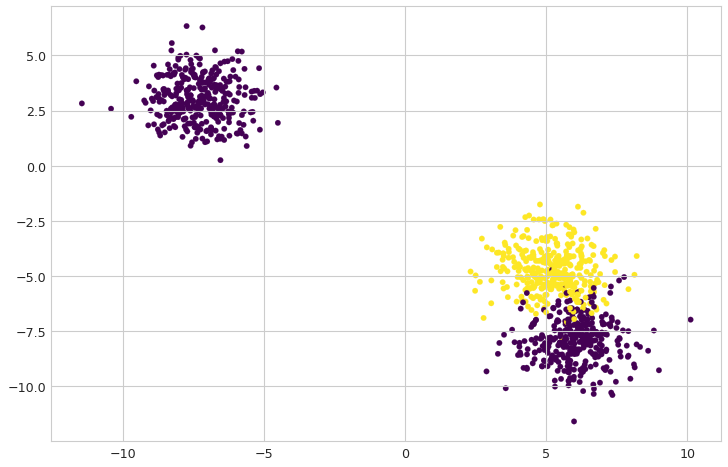

In [40]:
plt.scatter(x = X[:,0], y = X[:,1], c = y)

## Complex Valued Linear Classification

In [41]:
clc = ComplexLinearClassification(alpha = 0.05, n_iter=20000, stochastic = False)

clc.fit(X, y)

  1%|          | 109/20000 [00:01<03:46, 87.72it/s]/mnt/c/ubuntu20.04/projects/complex_machine_learning/linear_classification.py:88: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-1*z.imag/z.real))
100%|██████████| 20000/20000 [03:03<00:00, 109.06it/s]


In [42]:
print(f"Loss: {clc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == clc.predict(X))*100/len(y)}")

Loss: 0.03129284699362756
Percentage mapped correctly: 96.0


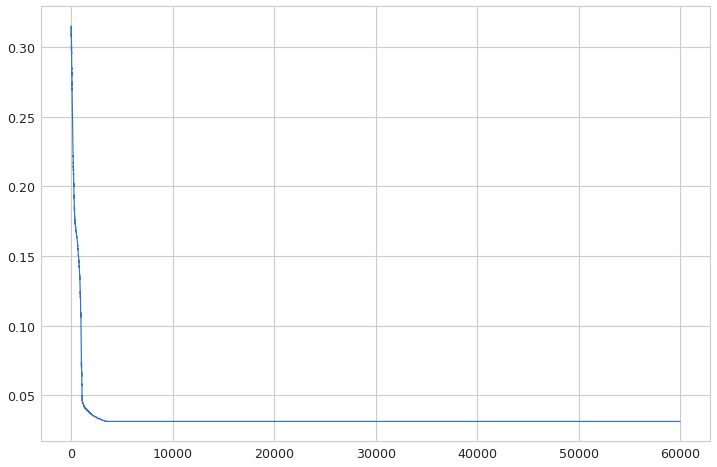

In [43]:
# Plot loss
plt.plot(clc.loss)

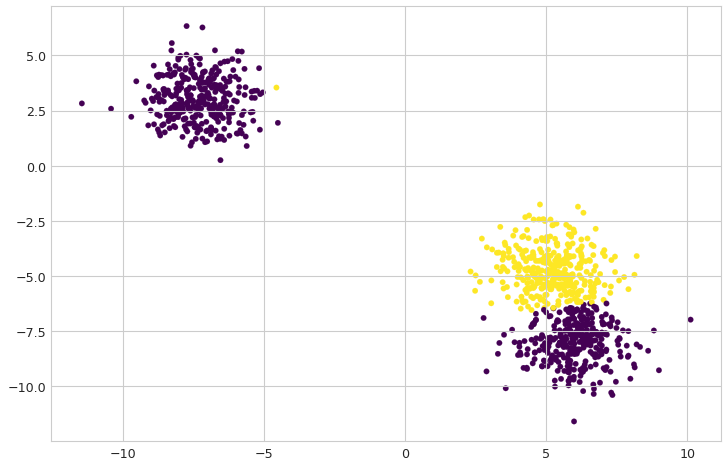

In [44]:
plt.scatter(x = X[:,0], y = X[:,1], c = clc.predict(X))

0 dimension path, with step count.


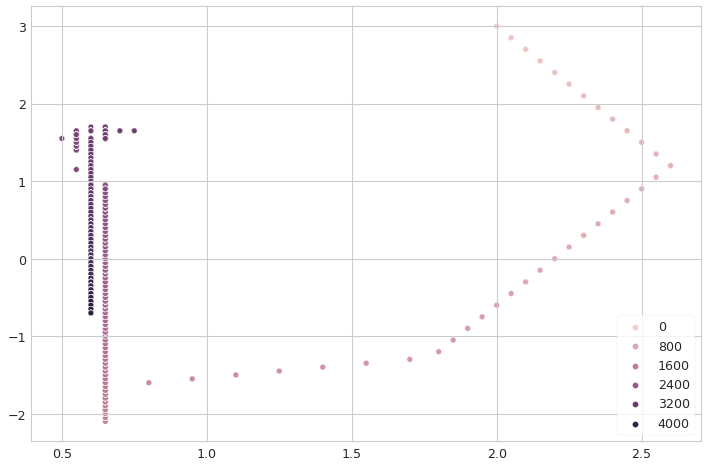


1 dimension path, with step count.


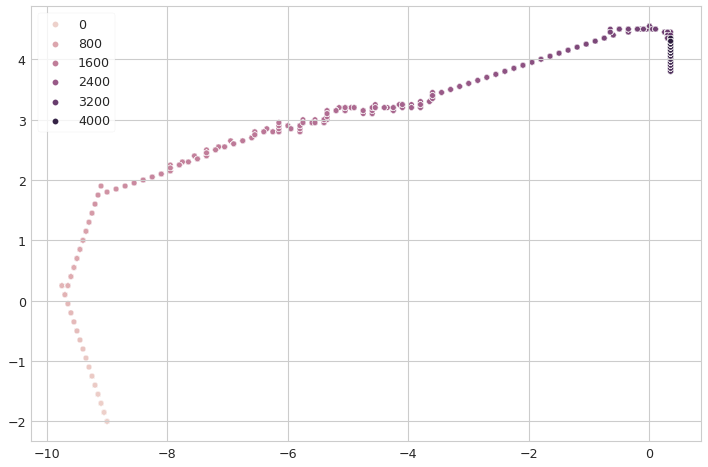


2 dimension path, with step count.


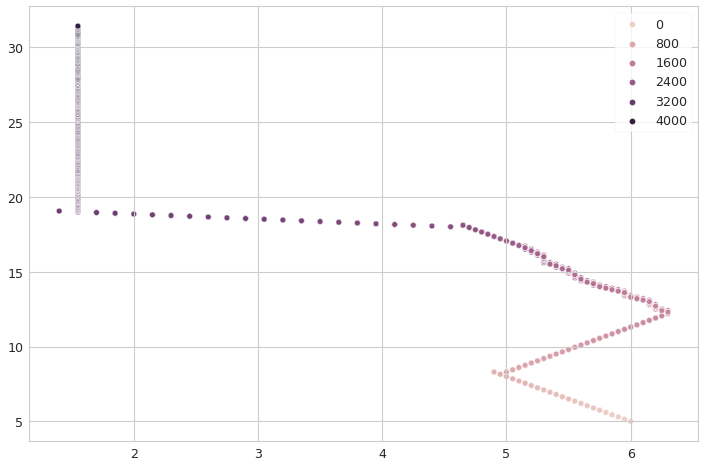

In [45]:
# Plot gradient path of variables
history = clc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =[i[j].real for i in history], y =[i[j].imag for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Real Valued Linear Classification

In [46]:
lc = LinearClassification(alpha = 0.005, n_iter=1000, stochastic = False)

lc.fit(X, y)

100%|██████████| 1000/1000 [00:03<00:00, 295.57it/s]


In [47]:
print(f"Loss: {lc.loss[-1]}")
print(f"Percentage mapped correctly: {sum(y == lc.predict(X))*100/len(y)}")

Loss: 0.13895995843306305
Percentage mapped correctly: 84.0


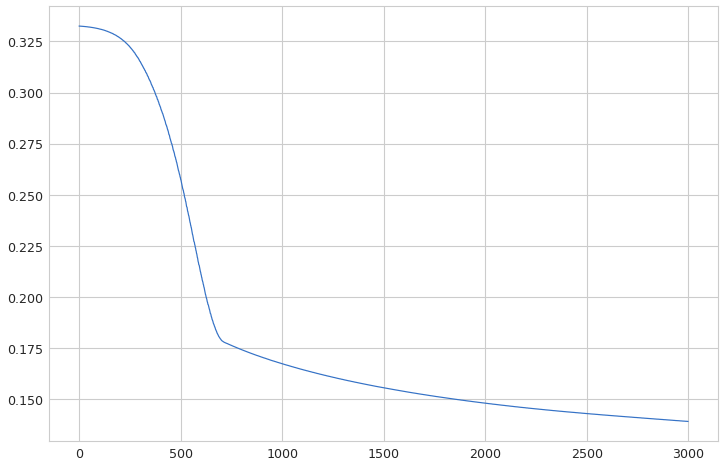

In [48]:
# Plot loss
plt.plot(lc.loss)

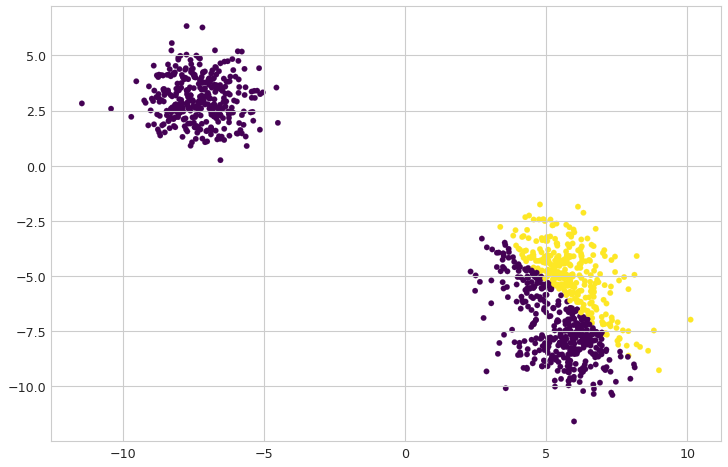

In [49]:
plt.scatter(x = X[:,0], y = X[:,1], c = lc.predict(X))

0 dimension path, with step count.


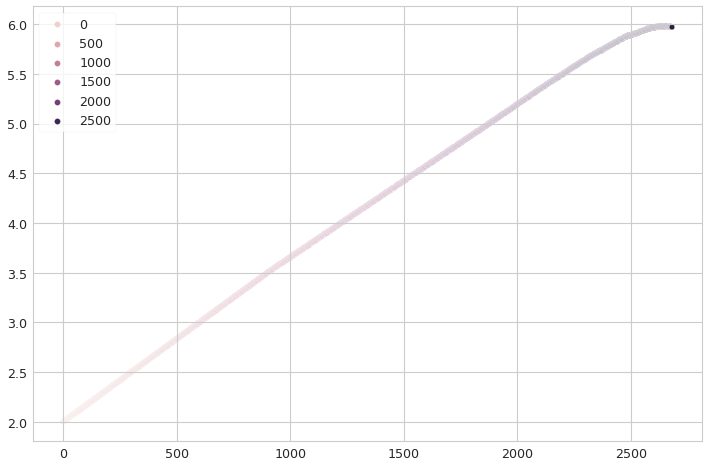


1 dimension path, with step count.


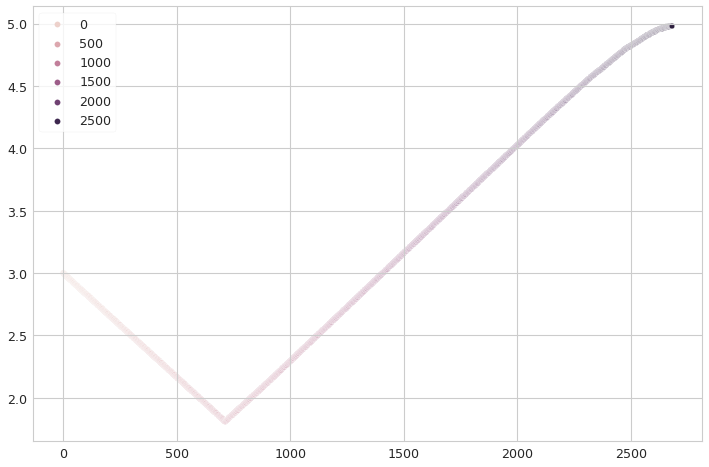


2 dimension path, with step count.


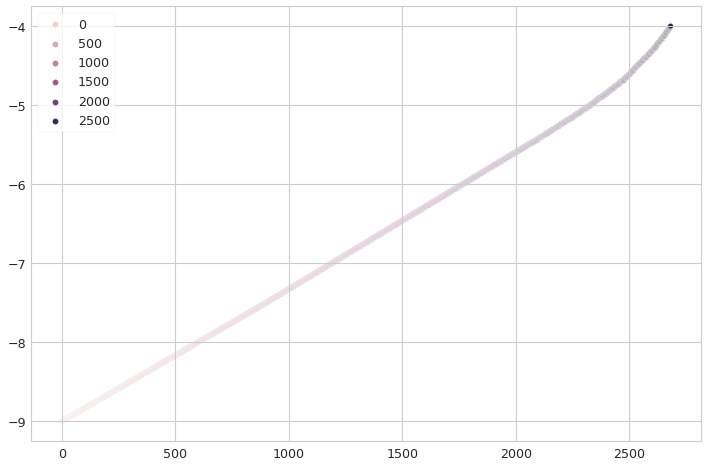

In [50]:
# Plot gradient path of variables
history = lc.weights_history
for j in range(history[0].shape[0]):
    print(f"{j} dimension path, with step count.")
    sns.scatterplot(x =range(len(history)), y =[i[j] for i in history], hue = range(len(history)))
    plt.show()
    print("")

## Sklearn Logestic Regression

Percentage mapped correctly: 87.7


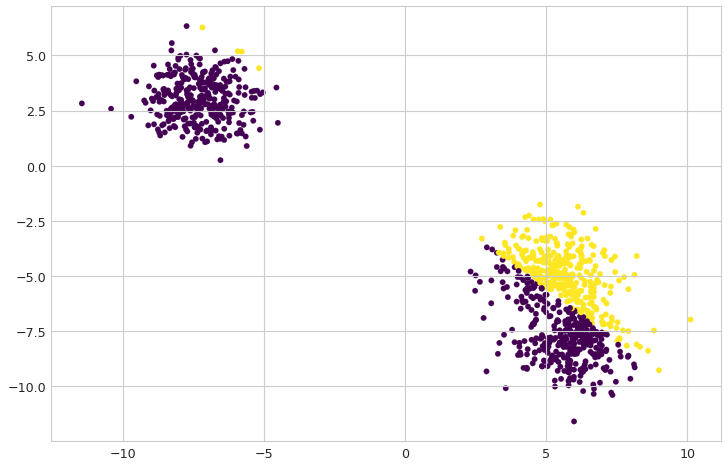

In [51]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()

log_r.fit(X, y)

print(f"Percentage mapped correctly: {sum(y == log_r.predict(X))*100/len(y)}")

plt.scatter(x = X[:,0], y = X[:,1], c = log_r.predict(X))

# Compare to non-linear Classifier

### SGDClassifier (... this is linear)

Percentage mapped correctly: 82.6


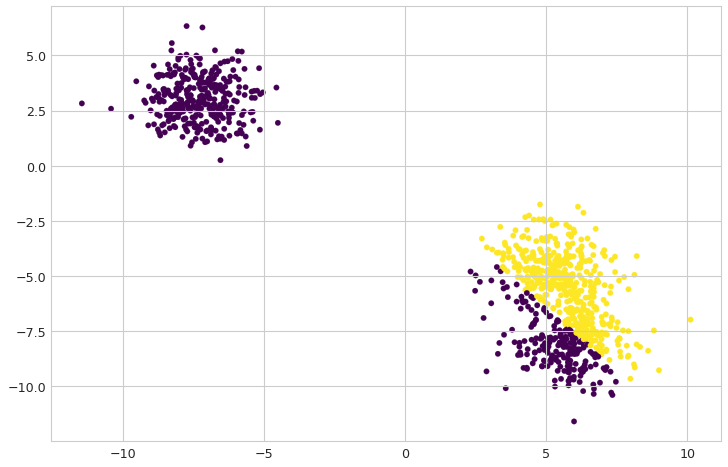

In [52]:
from sklearn.linear_model import SGDClassifier
sgd_c = SGDClassifier()

sgd_c.fit(X, y)

print(f"Percentage mapped correctly: {sum(y == sgd_c.predict(X))*100/len(y)}")

plt.scatter(x = X[:,0], y = X[:,1], c = sgd_c.predict(X))

### MLPClassifier

Percentage mapped correctly: 96.0


/home/daire/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


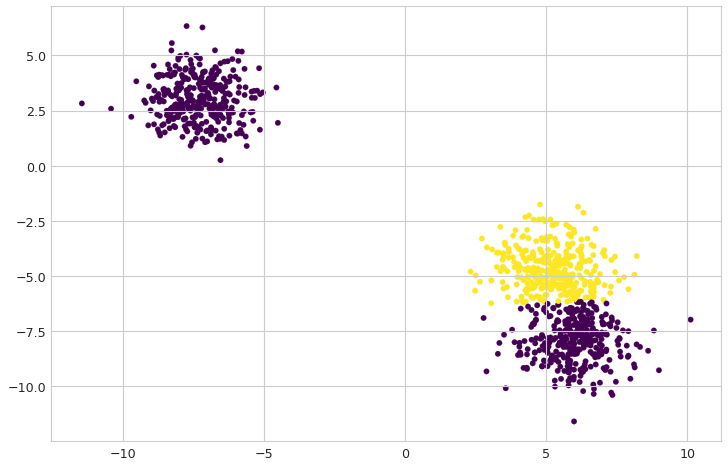

In [53]:
from sklearn.neural_network import MLPClassifier
mlp_c = MLPClassifier()

mlp_c.fit(X, y)

print(f"Percentage mapped correctly: {sum(y == mlp_c.predict(X))*100/len(y)}")

plt.scatter(x = X[:,0], y = X[:,1], c = mlp_c.predict(X))

### SVM

Percentage mapped correctly: 96.0


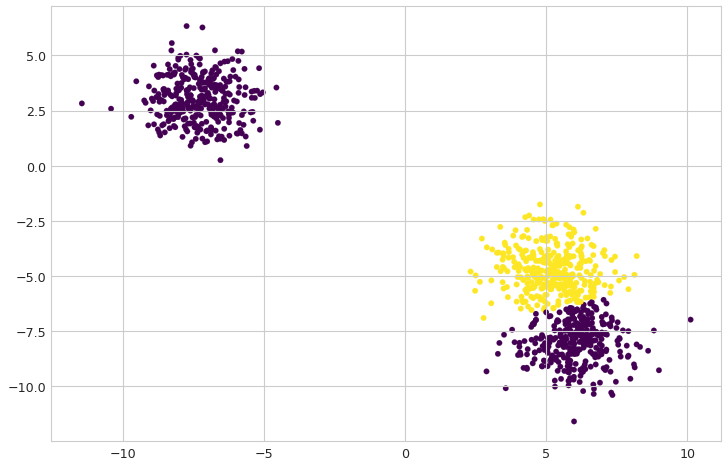

In [54]:
from sklearn.svm import SVC
svm_c = SVC()

svm_c.fit(X, y)

print(f"Percentage mapped correctly: {sum(y == svm_c.predict(X))*100/len(y)}")

plt.scatter(x = X[:,0], y = X[:,1], c = svm_c.predict(X))

### RandomForestClassifier

Percentage mapped correctly: 100.0


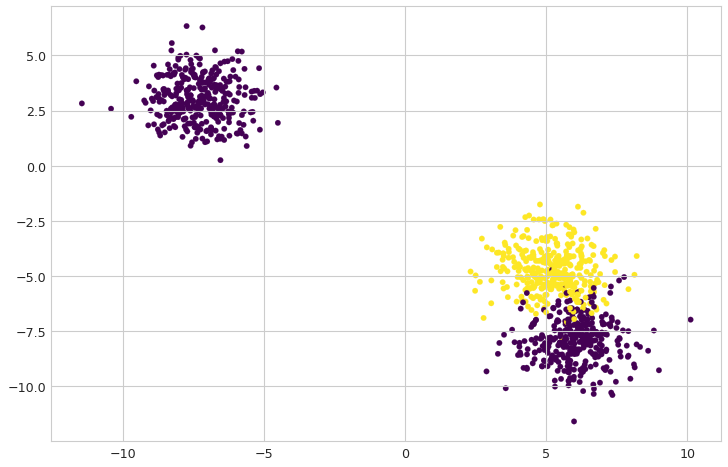

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()

rf_c.fit(X, y)

print(f"Percentage mapped correctly: {sum(y == rf_c.predict(X))*100/len(y)}")

plt.scatter(x = X[:,0], y = X[:,1], c = rf_c.predict(X))